In [49]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
import sys
sys.path.append("../src/")
import ubs8k.signal_augmentations as sig_aug
import ubs8k.spec_augmentations as spec_aug
import ubs8k.img_augmentations as img_aug

from ubs8k.datasetManager import DatasetManager
from ubs8k.generators import Dataset

# Load some data 

*loading dataset directly from osirim takes some time.*

*One folder ~= 2 minutes*

In [11]:
audio_root = "/mnt/osirim_projets/UrbanSound8K/audio"
metadata_root = "/mnt/osirim_projets/UrbanSound8K/metadata"

dataset = DatasetManager(metadata_root, audio_root, verbose=1, train_fold=[10], val_fold=[])

100%|██████████| 1/1 [01:52<00:00, 112.81s/it]
0it [00:00, ?it/s]


In [12]:
train_dataset = Dataset(dataset, augments=[])

# Utility function

In [38]:
import matplotlib.pyplot as plt

def display(spec_orig, spec_augm):
    
    plt.figure(0, figsize=(5, 3))
    
    # Image original
    #plt.subplot(1, 3, 1)
    #plt.matshow(spec_orig, fignum=0)

    plt.subplot(1, 1, 1)
    plt.matshow(spec_augm, fignum=0)
    
    #plt.subplot(1, 3, 3)
    #plt.matshow(spec_orig - spec_augm, fignum=0)
    
    plt.show()

# Spectrogram augmentation

In [22]:
spec_orig, y = train_dataset[0]

## SpecAugment stretch

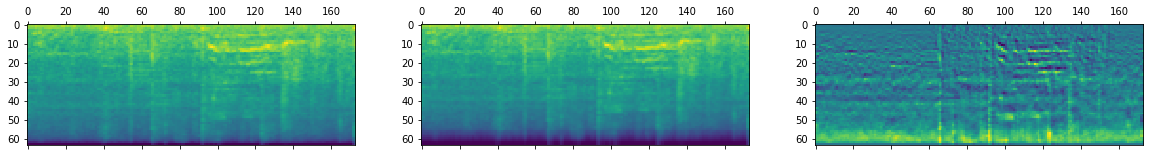

In [30]:
fts_func = spec_aug.FractalTimeStretch(1.0,
                                       intra_ratio = 0.3,
                                       min_chunk_size=5,
                                       max_chunk_size=16,
                                       rate=(0.8, 1.2)
)
ffs_func = spec_aug.FractalFreqStretch(1.0,
                                      intra_ratio=0.3,
                                      min_chunk_size=4,
                                      max_chunk_size=12,
                                      rate=(0.9, 1.1)
)

spec_augmented = fts_func(ffs_func(spec_orig))

display(spec_orig, spec_augmented)

## SpecAugment Dropout

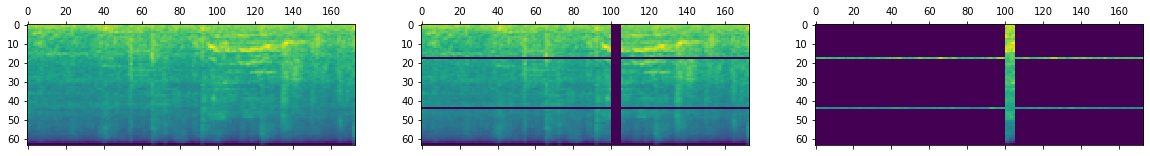

In [32]:
ftd_func = spec_aug.FractalTimeDropout(1.0,
                                       min_chunk_size=2,
                                       max_chunk_size=8,
                                       min_chunk=1,
                                       max_chunk=2,
)
ffd_func = spec_aug.FractalFrecDropout(1.0,
                                      min_chunk_size=1,
                                      max_chunk_size=2,
                                      min_chunk=2,
                                      max_chunk=2,
)

spec_augmented = ffd_func(ftd_func(spec_orig))

display(spec_orig, spec_augmented)

In [54]:
for fMcs in [2, 3, 4, 6]:
    for tMcs in [6, 8, 15, 20]:
        print("spec_aug.FractalDropout(1.0, freq_min_chunk_size=1, freq_max_chunk_size=%s, freq_min_chunk=1, freq_max_chunk=2, time_min_chunk_size=1, time_max_chunk_size=%s, time_min_chunk=1, time_max_chunk=2)" % (fMcs, tMcs))
        continue

        print("=======================================================")
        print(" Freq Max Chunk Size = ", fMcs)
        print(" Time Max Chunk Size = ", tMcs)
        print("=======================================================")
        for _ in range(5):
            spec_augmented = fd_func(spec_orig)
            display(spec_orig, spec_augmented)

spec_aug.FractalDropout(1.0, freq_min_chunk_size=1, freq_max_chunk_size=2, freq_min_chunk=1, freq_max_chunk=2, time_min_chunk_size=1, time_max_chunk_size=6, time_min_chunk=1, time_max_chunk=2)
spec_aug.FractalDropout(1.0, freq_min_chunk_size=1, freq_max_chunk_size=2, freq_min_chunk=1, freq_max_chunk=2, time_min_chunk_size=1, time_max_chunk_size=8, time_min_chunk=1, time_max_chunk=2)
spec_aug.FractalDropout(1.0, freq_min_chunk_size=1, freq_max_chunk_size=2, freq_min_chunk=1, freq_max_chunk=2, time_min_chunk_size=1, time_max_chunk_size=15, time_min_chunk=1, time_max_chunk=2)
spec_aug.FractalDropout(1.0, freq_min_chunk_size=1, freq_max_chunk_size=2, freq_min_chunk=1, freq_max_chunk=2, time_min_chunk_size=1, time_max_chunk_size=20, time_min_chunk=1, time_max_chunk=2)
spec_aug.FractalDropout(1.0, freq_min_chunk_size=1, freq_max_chunk_size=3, freq_min_chunk=1, freq_max_chunk=2, time_min_chunk_size=1, time_max_chunk_size=6, time_min_chunk=1, time_max_chunk=2)
spec_aug.FractalDropout(1.0, freq